Project 3 - Retail

DESCRIPTION  
Problem Statement  
•	It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.  
•	Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits  
•	Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


Project Task:Week 1  
Data Cleaning:
1. Perform a preliminary data inspection and data cleaning.
a. Check for missing data and formulate an apt strategy to treat them.
b. Remove duplicate data records.
c. Perform descriptive analytics on the given data.
Data Transformation:
2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.
a. Create month cohorts and analyze active customers for each cohort.
b. Analyze the retention rate of customers.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the train dataset
df_train = pd.read_excel('train.xlsx')
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [3]:
# read test dataset
df_test = pd.read_excel('test.xlsx')
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [4]:
print(df_train.shape)
print(df_test.shape)

(379336, 8)
(162573, 8)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [6]:
#append df_test at the end of df_train
# to append df2 at the end of df1 dataframe 
df = df_train.append(df_test)
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [7]:
#cleaning the data
#1. if invoice number starts with C then it's cancelled transaction
#so we need to delete those transaction along with the original.delete duplicate record.
#2. convert invoicedate to datetime column. parse this column to datetime format in pandas.
#3. calculate/generate new column product price using quantity x unitprice
#4. some customer id(s) are missing, so find those and manually put some random generated number.
# use random() to create 6 digit random number.
#5.create total cancellation amount. if the total cancellation amout=actual amount of the invoice, 
# then only delete those invoice no with c prefixed invoice number
# if not then delete only those cancelled invoice and deduct those cancellation amont from the 
# orginal amount of the invoice amount



In [8]:
# check null. only 'CustomerID' has some NULL value present
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [9]:
#check ZERO value
df.eq(0).sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice      2515
CustomerID        0
Country           0
dtype: int64

In [10]:
#replace 0 with mean value in 'UnitPrice' column where i can see 0 exists
df['UnitPrice'] = df['UnitPrice'].replace(0, df['UnitPrice'].mean())

In [11]:
#now check ZERO value
df.eq(0).sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# take only InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID

#df_train = df_train['InvoiceNo','Description','Quantity','InvoiceDate','UnitPrice','CustomerID']
# Calculate Product_Price = UnitPrice * Quantity
df['Product_Price'] = df['UnitPrice'] * df['Quantity']
df.head()
df.shape

(541909, 9)

In [13]:
#EDA
df.describe()

,Quantity,UnitPrice,CustomerID,Product_Price
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.632514,15287.690570,16.844574
std,218.081158,96.759341,1713.600303,415.456876
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.480000
50%,3.000000,2.100000,15152.000000,9.780000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [14]:
# Select Cancelled InvoiceNo(value starts with C) and remove them
#By using .str, you can enable string functions and can apply on pandas dataframe. str[0] means first letter.
#df[df['var1'].str[0] == 'A']

#df[df['InvoiceNo'].str[0] == 'C']
df[df['InvoiceNo'].str[0] != 'C']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product_Price
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom,1.25
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50
...,...,...,...,...,...,...,...,...,...
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom,50.40
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland,7.80
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom,23.40
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom,8.50


NOTE :  
cancelled Invoice : 9288 rows  
Total rows : 541909 rows

So good transactions are :
541909 - 9288 = 532621 rows

In [15]:
#some customer id(s) are missing, so find those and put some random generated number.
# use random() to create 6 digit random number.

import secrets

#Getting systemRandom class instance out of secrets module
secretsGenerator = secrets.SystemRandom()

print("Generating 5 digit random OTP")
otp = secretsGenerator.randrange(10000, 99999)

print("Secure random OTP is ", otp)


Generating 5 digit random OTP
Secure random OTP is  69460


In [16]:
import secrets
#df_test=["1','2','3']]
#for x in df_test:
#    print(x)
for x in df['CustomerID']:
    #print(x,np.isnan(x))
    #print(np.isnan(x))
    secretsGenerator = secrets.SystemRandom()
    otp = secretsGenerator.randrange(10000, 99999)
    print("Secure random OTP is ", otp)
    df['CustomerID'].fillna(otp,inplace=True)
    #if np.isnan(x) == "True":
       #data_rnr['GENDER'].fillna("GENDER DATA- NOT AVAILABLE",inplace=True)
       #df['CustomerID'].fillna(otp,inplace=True)

Streaming output truncated to the last 5000 lines.
Secure random OTP is  70232
Secure random OTP is  86257
Secure random OTP is  68131
Secure random OTP is  15293
Secure random OTP is  14831
Secure random OTP is  21568
Secure random OTP is  95028
Secure random OTP is  54778
Secure random OTP is  15240
Secure random OTP is  12437
Secure random OTP is  36306
Secure random OTP is  34468
Secure random OTP is  92697
Secure random OTP is  33720
Secure random OTP is  61579
Secure random OTP is  84802
Secure random OTP is  40159
Secure random OTP is  31674
Secure random OTP is  37326
Secure random OTP is  74758
Secure random OTP is  28411
Secure random OTP is  18167
Secure random OTP is  21952
Secure random OTP is  92696
Secure random OTP is  26278
Secure random OTP is  17695
Secure random OTP is  99622
Secure random OTP is  25745
Secure random OTP is  19710
Secure random OTP is  34678
Secure random OTP is  37703
Secure random OTP is  58424
Secure random OTP is  25418
Secure random OTP is  457

In [17]:
df.head(20)
df.isnull().any()

InvoiceNo        False
StockCode        False
Description       True
Quantity         False
InvoiceDate      False
UnitPrice        False
CustomerID       False
Country          False
Product_Price    False
dtype: bool

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product_Price
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,72363.0,United Kingdom,1.25
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50


In [19]:

#### HOLD this Cohort Analysis Script for NOW

# Perform Cohort Analysis By Month from InvoiceDate
# Create a period column based on the InvoiceDate
# Since we're doing monthly cohorts, we'll be looking at the total monthly behavior of our users. 
# Therefore, we don't want granular InvoiceDate data (right now).

# A lambda function is a small anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# Example :
# x = lambda a, b: a * b
# print(x(5, 6))
# The output will return 30

#df['InvoicePeriod'] = df.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
#df.head()
######################################

In [20]:
#df.set_index('UserId', inplace=True)
# min() find the earliest date
#df['CohortGroup'] = df.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
#df.reset_index(inplace=True)
#df.head()

Since we're looking at monthly cohorts, we need to   aggregate users, orders, and amount spent by the CohortGroup within the month (OrderPeriod).

In [21]:
#grouped = df.groupby(['CohortGroup', 'InvoicePeriod'])

#CustomerID	,	StockCode, Product_Price
# count the unique users, orders, and total revenue per Group + Period
#cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
#                       'StockCode': pd.Series.nunique,
#                       'Product_Price': np.sum})

# make the column names more meaningful
#cohorts.rename(columns={'CustomerID': 'TotalUsers',
#                        'StockCode': 'TotalOrders'}, inplace=True)
#cohorts.head(20)

Label the CohortPeriod for each CohortGroup :
  
We want to look at how each cohort has behaved in the months following their first purchase, so we'll need to index each cohort to their first purchase month. For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.

This allows us to compare cohorts across various stages of their lifetime.

In [22]:
#def cohort_period(df):
#    """
#    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
#    Example
#    -------
#    Say you want to get the 3rd month for every user:
#        df.sort(['UserId', 'OrderTime', inplace=True)
#        df = df.groupby('UserId').apply(cohort_period)
#        df[df.CohortPeriod == 3]
#    """
#    df['CohortPeriod'] = np.arange(len(df)) + 1
#    return df

#cohorts = cohorts.groupby(level=0).apply(cohort_period)
#cohorts.head()

In [38]:
#### USE THE BELOW SCRIPT FOR COHORT ANALYSIS
import datetime as dt

# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create function to truncate given date in column to a first day of the month
def get_month(x):
    return dt.datetime(x.year,x.month,1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

grouping = df.groupby('CustomerID')['InvoiceMonth']

df['CohortMonth'] = grouping.transform('min')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product_Price,InvoiceMonth,CohortMonth,CohortIndex,YearMonth
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,72363.0,United Kingdom,1.25,2011-07-01,2010-12-01,7,201107
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-01,2011-02-01,4,201106
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-01,2010-12-01,5,201105
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-01,2010-12-01,1,201101
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-01,2010-12-01,0,201012


In [41]:
import datetime as dt

def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

invoice_year,invoice_month, _ = get_date_int(df,'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df,'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1
#df['CohortIndex'] = years_diff * 12 + months_diff
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product_Price,InvoiceMonth,CohortMonth,CohortIndex,YearMonth
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,72363.0,United Kingdom,1.25,2011-07-01,2010-12-01,8,201107
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-01,2011-02-01,5,201106
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-01,2010-12-01,6,201105
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-01,2010-12-01,2,201101
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-01,2010-12-01,1,201012


In [43]:
# count monthly active customers for each cohort
grouping = df.groupby(['CohortMonth','CohortIndex'])
#unique values in a particular column. Pandas nunique() is used to get a count of unique values.
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

print(cohort_data)
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')

# Here, we calculate the monthly active customers from each cohort 
# that went on to make a subsequent purchase at a later month.
print(cohort_counts)


   CohortMonth  CohortIndex  CustomerID
0   2010-12-01            1         949
1   2010-12-01            2         363
2   2010-12-01            3         318
3   2010-12-01            4         368
4   2010-12-01            5         342
..         ...          ...         ...
86  2011-10-01            2          93
87  2011-10-01            3          46
88  2011-11-01            1         321
89  2011-11-01            2          43
90  2011-12-01            1          41

[91 rows x 3 columns]
CohortIndex     1      2      3      4   ...     10     11     12     13
CohortMonth                              ...                            
2010-12-01   949.0  363.0  318.0  368.0  ...  375.0  355.0  475.0  261.0
2011-01-01   421.0  101.0  119.0  102.0  ...  146.0  155.0   63.0    NaN
2011-02-01   380.0   94.0   73.0  106.0  ...  119.0   35.0    NaN    NaN
2011-03-01   440.0   84.0  112.0   96.0  ...   39.0    NaN    NaN    NaN
2011-04-01   299.0   68.0   66.0   63.0  ...    NaN    NaN 

In [49]:
# --Calculate Retention Rate--
# getting the 1st column value
cohort_sizes = cohort_counts.iloc[:,0]
#cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)
#retention
#covert retention value to %
retention.round(3) * 100
retention.index = retention.index.strftime('%m-%Y')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
12-2010,1.0,0.382508,0.335090,0.387777,0.360379,0.397260,0.380400,0.355111,0.355111,0.395153,0.374078,0.500527,0.275026
01-2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
02-2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
03-2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
04-2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
05-2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
06-2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
07-2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# --Calculate Average Quantity--
grouping_qty = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_qty = grouping_qty['Quantity'].mean()
cohort_data_qty = cohort_data_qty.reset_index()
average_quantity = cohort_data_qty.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.index = average_quantity.index.strftime('%m-%Y')
# --Calculate Average Price--
grouping_price = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_price = grouping_price['UnitPrice'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='UnitPrice')
average_price.index = average_price.index.strftime('%m-%Y')

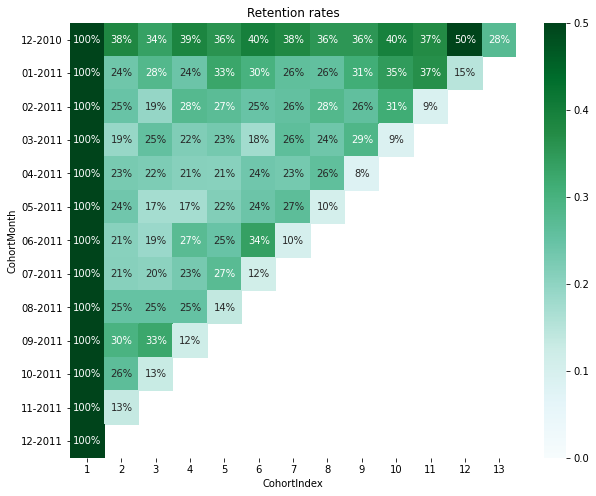

In [51]:
# --Plot heatmap using seaborn--
# Plot retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

RFM Analysis :  
For the analysis, we will use a retail customer data of 541909 customers having a time period of 1 year.

Here we will take year as 2011 

In [26]:
# let us convert InvoiceDate in YYYYMM format

#from datetime import datetime
#strftime() ---> to convert date, time and datetime objects to its equivalent string
# strptime() --> create a datetime object from a string
# %d  --> Day of the month as a zero-padded decimal. Example 01,02 etc.
# %m	--> Month as a zero-padded decimal number. Example 01,02 etc.
# %Y ---> Year in four digits. Example: 2018, 2019 etc

df['YearMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y%m'))
#df.info()
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product_Price,InvoiceMonth,CohortMonth,CohortIndex,YearMonth
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,72363.0,United Kingdom,1.25,2011-07-01,2010-12-01,7,201107
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-01,2011-02-01,4,201106
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-01,2010-12-01,5,201105
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-01,2010-12-01,1,201101
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-01,2010-12-01,0,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom,50.40,2011-11-01,2011-03-01,8,201111
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland,7.80,2011-03-01,2011-03-01,0,201103
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom,23.40,2011-10-01,2011-09-01,1,201110
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom,8.50,2011-05-01,2011-03-01,2,201105


In [27]:
# Checking country wise customer distribution
cust_country = df[['Country','CustomerID']].drop_duplicates()
cust_country.tail()

#Calculating the distinct count of customer for each country
cust_country_count=cust_country.groupby(['Country'])['CustomerID'].count()
# convert series to dataframe
cust_country_count = cust_country_count.to_frame()
# sort country by cout of CustomerID in descending order
cust_country_count.sort_values(by=['CustomerID'],ascending=False)
# the desceding output shows most of the customer's transactions are from United Kingdom
# so company should give priority to United Kingdom for it's marketing and other strategies.


,CustomerID
Country,
United Kingdom,3951
Germany,95
France,88
Spain,31
Belgium,25
Switzerland,22
Portugal,20
Italy,15
Finland,12


Now we will start with the RFM analysis.   
We will tag each customer on a scale of 1 to 5 for each of the criterion where 5 will be the highest and 1 will be the lowest tagging. The customers on the top of all the three criterion will be the most significant customers.

RFM (Recency, Frequency, Monetary) analysis :  
RFM criterion is one of the oldest and most widely used technique for selecting the most significant customers. It supports the selection of customers that are most recent (R), frequent (F), and add a larger monetary value (M) in every transaction.

In [28]:
# we will first filter the customers of United Kingdom and take distinct dates of their purchase.
cust_date_UK=df[df['Country']=="United Kingdom"]
#cust_date_UK.head(2)
cust_date_UK=cust_date_UK[['Country','CustomerID','YearMonth']].drop_duplicates()
cust_date_UK

,Country,CustomerID,YearMonth
0,United Kingdom,72363.0,201107
1,United Kingdom,16126.0,201106
2,United Kingdom,18118.0,201105
3,United Kingdom,15529.0,201101
4,United Kingdom,14448.0,201012
...,...,...,...
158199,United Kingdom,13120.0,201104
159066,United Kingdom,16927.0,201108
160245,United Kingdom,14513.0,201108
161734,United Kingdom,16598.0,201103


In [29]:
# Define R-Score (Recency Score)
# We will tag a customer from 1 to 5 in steps of 2 months
# i.e. 5 if customer bought in last 2 months else 4 if made a purchase in last 4 months and so on. 
# Finally for a customer, maximum of the recency flag is taken as final recency flag.

# Here we are taking year as 2011 for benchmark
# month > Otober (i.e. November or December) then R_Score is 5 which is Highest
def R_Score(row):
    # if customer bought in november or december(meant last 2 months)
    if int(row['YearMonth']) > 201110:
          val = 5
    # if customer bought between September and October then 4      
    elif int(row['YearMonth']) <= 201110 and int(row['YearMonth']) > 201108:
          val = 4
    # if customer bought between July and August then 3       
    elif int(row['YearMonth']) <= 201108 and int(row['YearMonth']) > 201106:    
          val = 3
    # if customer bought between May and June then 2        
    elif int(row['YearMonth']) <= 201106 and int(row['YearMonth']) > 201104:  
          val = 2
    else:
          # if customer bought between January and April then 1
          val = 1
    return val          

cust_date_UK['R_Score'] = cust_date_UK.apply(R_Score, axis=1)
# check the highest R_Score using group by customer and get the max R-Score value
cust_date_UK.sort_values(by=['R_Score'],ascending=False)
#cust_date_UK = cust_date_UK.groupby('CustomerID')['R_Score'].max()
#cust_date_UK

,Country,CustomerID,YearMonth,R_Score
41389,United Kingdom,18065.0,201112,5
3821,United Kingdom,17084.0,201111,5
118420,United Kingdom,16528.0,201112,5
44817,United Kingdom,14141.0,201112,5
3837,United Kingdom,15805.0,201111,5
...,...,...,...,...
49854,United Kingdom,16062.0,201104,1
49943,United Kingdom,17001.0,201012,1
49954,United Kingdom,14867.0,201101,1
11619,United Kingdom,14323.0,201104,1


In [30]:
#Define Frequency (F): F_Score
#The second most important factor is how frequently these customers purchase. 
#The higher the frequency, the higher is the chances of these responding to the offers.

#we will take country wise count of distinct invoice number for each customer and 
#then filter out the customers of United Kingdom.
#After that, invoice count will be split into 5 equal parts to rank the customers
# on a scale of 1 to 5 where 5 being the most frequent.

# Filter United Kingdom
cust_frequency_UK=df[df['Country']=="United Kingdom"]
cust_frequency_UK
cust_frequency_UK=cust_frequency_UK[['Country','InvoiceNo','CustomerID']].drop_duplicates()
cust_frequency_UK

#Calculating the count of unique purchase for each customer
cust_frequency_count_UK = cust_frequency_UK.groupby(['Country','CustomerID'])['InvoiceNo'].count()
type(cust_frequency_count_UK)

# convert series to dataframe
cust_frequency_count_UK = pd.DataFrame(cust_frequency_count_UK).reset_index()
cust_frequency_count_UK

#rename the meaningfull name of column InvoiceNo as count_InvoiceNo
cust_frequency_count_UK.rename(columns = {'InvoiceNo':'count_InvoiceNo'}, inplace = True) 
cust_frequency_count_UK.sort_values(by=['count_InvoiceNo'],ascending=False)



,Country,CustomerID,count_InvoiceNo
3950,United Kingdom,72363.0,3637
2,United Kingdom,12748.0,224
3621,United Kingdom,17841.0,169
1276,United Kingdom,14606.0,128
193,United Kingdom,13089.0,118
...,...,...,...
2325,United Kingdom,16050.0,1
2311,United Kingdom,16030.0,1
402,United Kingdom,13366.0,1
2308,United Kingdom,16026.0,1


In [31]:
# Define F_Score
# which customer count is more than 55 will get highest score as 5
def F_Score(row):
    if row['count_InvoiceNo'] <= 13:
        val = 1
    elif row['count_InvoiceNo'] > 13 and row['count_InvoiceNo'] <= 25:
        val = 2
    elif row['count_InvoiceNo'] > 25 and row['count_InvoiceNo'] <= 38:
        val = 3
    elif row['count_InvoiceNo'] > 38 and row['count_InvoiceNo'] <= 55:            
        val = 4
    else:
        val = 5
    return val    

cust_frequency_count_UK['F_Score'] = cust_frequency_count_UK.apply(F_Score, axis=1)
#cust_frequency_count_UK.info()
cust_frequency_count_UK.sort_values(by=['F_Score'],ascending=False)

,Country,CustomerID,count_InvoiceNo,F_Score
3950,United Kingdom,72363.0,3637,5
1218,United Kingdom,14527.0,86,5
3811,United Kingdom,18102.0,62,5
698,United Kingdom,13798.0,63,5
3621,United Kingdom,17841.0,169,5
...,...,...,...,...
1379,United Kingdom,14748.0,6,1
1380,United Kingdom,14752.0,1,1
1381,United Kingdom,14753.0,1,1
1382,United Kingdom,14754.0,2,1


Monetary Value (M):   
The third factor is the amount of money these customers have spent on purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less.
To tag the customers on the basis of monetary flag, we will take country wise sum of Total price for each customer and then filter out the customers of United Kingdom.

In [32]:
# filter United Kingdom
cust_monetary_UK=df[df['Country']=="United Kingdom"]
cust_monetary_UK
# calculate sum of Product_Price on group by Country,CustomerID
cust_monetary_UK = cust_monetary_UK.groupby(['Country','CustomerID'])['Product_Price'].sum()
#convert series to dataframe
cust_monetary_UK = pd.DataFrame(cust_monetary_UK).reset_index()

#rename meaningfull name of Product_Price as sum_Product_Price
cust_monetary_UK.rename(columns={'Product_Price':'sum_Product_Price'},inplace=True)
cust_monetary_UK.sort_values(by='sum_Product_Price',ascending=False)

,Country,CustomerID,sum_Product_Price
3950,United Kingdom,72363.0,736280.04157
3811,United Kingdom,18102.0,256438.49000
3340,United Kingdom,17450.0,187482.17000
3382,United Kingdom,17511.0,88125.38000
2788,United Kingdom,16684.0,65892.08000
...,...,...,...
2166,United Kingdom,15823.0,-840.76000
3451,United Kingdom,17603.0,-1165.30000
992,United Kingdom,14213.0,-1192.20000
1826,United Kingdom,15369.0,-1592.49000


In [33]:
#Defime M_Score
#Tagging customers in the range of 1 to 5 based on their Total price value, 
#where 5 corresponds the customers having highest monetary value:
# sum of Product_Price > 1932 will get the highest score as 5
def M_Score(row):
    if row['sum_Product_Price'] <= 243:
        val = 1
    elif row['sum_Product_Price'] > 243 and row['sum_Product_Price'] <= 463:
        val = 2
    elif row['sum_Product_Price'] > 463 and row['sum_Product_Price'] <= 892:
        val = 3
    elif row['sum_Product_Price'] > 892 and row['sum_Product_Price'] <= 1932:
        val = 4
    else:
        val = 5
    return val

cust_monetary_UK['M_Score'] = cust_monetary_UK.apply(M_Score, axis=1)
cust_monetary_UK.sort_values(by='M_Score',ascending=False)

,Country,CustomerID,sum_Product_Price,M_Score
1975,United Kingdom,15572.0,2552.86,5
2201,United Kingdom,15867.0,3797.79,5
1657,United Kingdom,15144.0,6530.04,5
1654,United Kingdom,15140.0,2350.00,5
1646,United Kingdom,15129.0,3447.40,5
...,...,...,...,...
1328,United Kingdom,14679.0,-2.55,1
2942,United Kingdom,16887.0,194.88,1
2946,United Kingdom,16893.0,145.93,1
2947,United Kingdom,16895.0,219.14,1


In [34]:
# Combining all the three (R, F, M ) Scores :
cust_UK_All=pd.merge(cust_date_UK,cust_frequency_count_UK[['CustomerID','F_Score']],\
                     on=['CustomerID'],how='left')

cust_UK_All = pd.merge(cust_UK_All,cust_monetary_UK[['CustomerID','M_Score']],\
                       on=['CustomerID'],how='left')
#cust_UK_All
cust_UK_All=cust_UK_All[['CustomerID','R_Score','F_Score','M_Score']].drop_duplicates()
# RFM Value = Average of R,F & M Score
#RFM Value = (R_Score + F_Score + M_Score) / 3
cust_UK_All['RFM_Score'] = cust_UK_All['R_Score']+cust_UK_All['F_Score']+cust_UK_All['M_Score']
cust_UK_All['RFM_Value'] = cust_UK_All['RFM_Score'] / 3
cust_UK_All
#cust_UK_All.sort_values(by='RFM_Value',ascending=False)



,CustomerID,R_Score,F_Score,M_Score,RFM_Score,RFM_Value
0,72363.0,3,5,5,13,4.333333
1,16126.0,2,1,5,8,2.666667
2,18118.0,2,3,5,10,3.333333
3,15529.0,1,1,5,7,2.333333
4,14448.0,1,1,2,4,1.333333
...,...,...,...,...,...,...
12333,16253.0,5,1,5,11,3.666667
12336,14768.0,4,1,1,6,2.000000
12338,13120.0,1,1,1,3,1.000000
12339,16927.0,3,1,3,7,2.333333
